## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Get length of both files
# print(len(mouse_metadata))
# print(len(study_results))

# Combine the data into a single dataset
all_mouse_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
all_mouse_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
num_mice = len(all_mouse_data_df)
print(f"The number of mice: {num_mice}")

The number of mice: 1893


In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = all_mouse_data_df[all_mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = all_mouse_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Check the number of mice in the clean DataFrame.
num_mice_clean = len(clean_mouse_data)
print(f"The number of mice: {num_mice_clean}")

The number of mice: 1888


## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_data[['Tumor Volume (mm3)', 'Drug Regimen']].describe()

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Tumor Volume (mm3)
count,1888.000000
mean,50.448411
std,8.904752
min,22.050126
25%,45.000000
50%,48.951421
75%,56.324075
max,78.567014


In [8]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
clean_mouse_data[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').describe()
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.382993  6.574208  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.783528  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

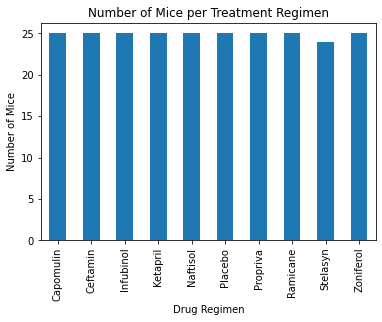

In [9]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen 
# throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot

clean_mouse_data.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar')

plt.title('Number of Mice per Treatment Regimen')
plt.ylabel('Number of Mice')
plt.show()


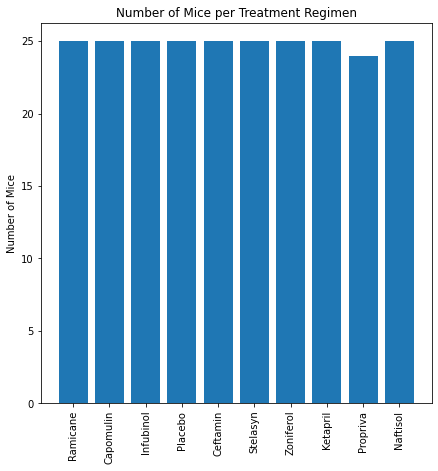

In [10]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas

x_axis=clean_mouse_data['Drug Regimen'].unique()
plt.figure(figsize=(7,7))
plt.bar(x_axis, clean_mouse_data.groupby('Drug Regimen')['Mouse ID'].nunique())
plt.title('Number of Mice per Treatment Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=90)
plt.show()

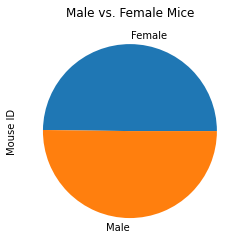

In [11]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot

clean_mouse_data.groupby('Sex')['Mouse ID'].nunique().plot(kind='pie')

plt.title('Male vs. Female Mice')
plt.show()

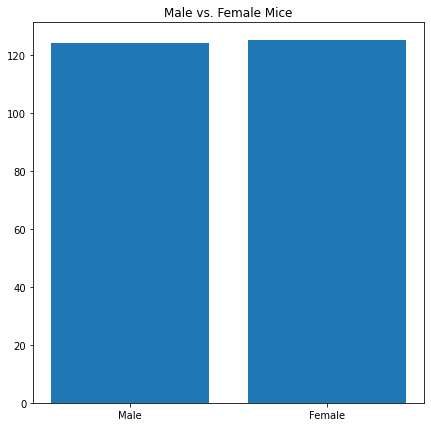

In [12]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

x_axis=clean_mouse_data['Sex'].unique()
plt.figure(figsize=(7,7))
plt.bar(x_axis, clean_mouse_data.groupby('Sex')['Mouse ID'].nunique())
plt.title('Male vs. Female Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_mouse_data.head(50)

# Start by getting the last (latest) timepoint for each mouse
latest_timepoint = clean_mouse_data[clean_mouse_data.Timepoint.eq(45)]
latest_timepoint


# filter dataframe to only show the 4 drug regimens listed above
filtered_drug_regimen = latest_timepoint.loc[(latest_timepoint['Drug Regimen'] == 'Capomulin') | \
                                             (latest_timepoint['Drug Regimen'] == 'Ramicane') | \
                                             (latest_timepoint['Drug Regimen'] == 'Infubinol') | \
                                             (latest_timepoint['Drug Regimen'] == 'Ceftamin') \
                                            ]

filtered_drug_regimen

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [14]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)
regimen_list = filtered_drug_regimen["Drug Regimen"]
each_mouse = filtered_drug_regimen["Mouse ID"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimen_tumor_df = pd.DataFrame()


for i in each_mouse:
    tumor_data = filtered_drug_regimen[filtered_drug_regimen["Mouse ID"]==i]["Tumor Volume (mm3)"].sum()
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_list_per = filtered_drug_regimen[filtered_drug_regimen["Mouse ID"]==i]["Drug Regimen"].unique()
    
    # add subset 
    regimen_tumor_df = regimen_tumor_df.append({"Mouse ID": i, "Drug Regimen": regimen_list_per, "Total Tumor Volume":tumor_data}, ignore_index=True)
regimen_tumor_df
   
    # Determine outliers using upper and lower bounds
sorted_by_volume = regimen_tumor_df.sort_values(by='Total Tumor Volume', ascending=False)
sorted_tumor = sorted_by_volume['Total Tumor Volume']
sorted_tumor

quartiles = sorted_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume is: 33.48002734
The upper quartile of tumor volume is: 62.14221369
The interquartile range of tumor volume is: 28.66218635
The the median of tumor volume is: 40.1592203 
Values below -9.513252184999999 could be outliers.
Values above 105.135493215 could be outliers.


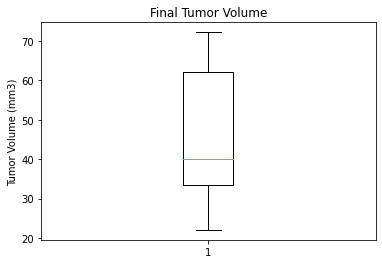

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(sorted_tumor)
plt.show()

## Line and Scatter Plots

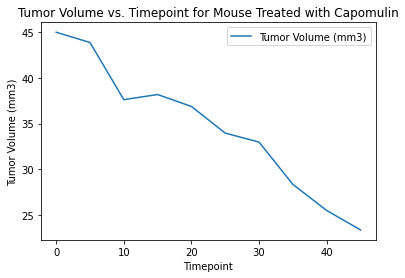

In [16]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
clean_mouse_data

filtered_df = clean_mouse_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
filtered_df

filtered_capomulin = filtered_df.loc[(filtered_df['Drug Regimen'] == 'Capomulin') & (filtered_df['Mouse ID'] == 's185')]
filtered_capomulin

filtered_capomulin.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse Treated with Capomulin')
plt.show()

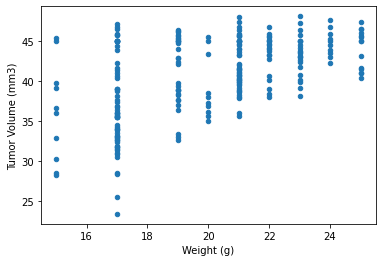

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
clean_mouse_data

filtered_df_scatter = clean_mouse_data[['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']]
filtered_df_scatter

filtered_capomulin_scatter = filtered_df_scatter.loc[(filtered_df_scatter['Drug Regimen'] == 'Capomulin')]
filtered_capomulin_scatter


filtered_capomulin_scatter.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
clean_mouse_data

filtered_capomulin = clean_mouse_data.loc[(filtered_df['Drug Regimen'] == 'Capomulin')]
filtered_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [19]:
mouse_weight = filtered_capomulin.iloc[:,5]
tumor_vol = filtered_capomulin.iloc[:,7]
correlation = st.pearsonr(mouse_weight, tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.58


The r-squared is: 0.2763600223455911


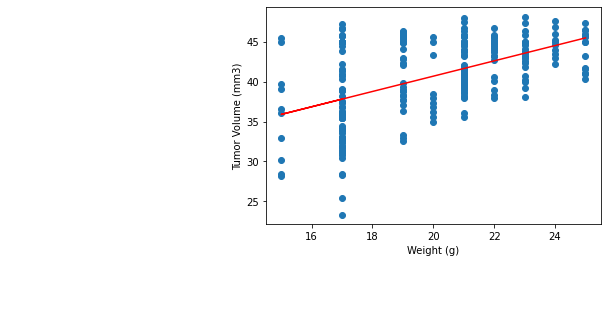

In [20]:
x_values = filtered_capomulin['Weight (g)']
y_values = filtered_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()